# Descripción del proyecto

El objetivo de este proyecto es ayudar a optimizar los gastos de marketing del departamento analítico de Y.Afisha

Lo que tenemos:

- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Lo que vas a investigaremos:

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes



# Descarga los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Creamos variables para las 3 tablas que utilizaremos en este proyecto. Adicionalmente, cambiaremos las columnas
# que sean de fecha a Datetime.

visits = pd.read_csv("/datasets/visits_log_us.csv",parse_dates=['Start Ts','End Ts'])
costs = pd.read_csv("/datasets/costs_us.csv",parse_dates=['dt'])
orders = pd.read_csv("/datasets/orders_log_us.csv",parse_dates=['Buy Ts'])


In [3]:
# Análisis exploratorio de la tabla "visits"
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Imprimir una muestra de la tabla "visits"

visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# Análisis exploratorio de la tabla "costs"

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [6]:
# Imprimir una muestra de la tabla "costs"

costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [7]:
# Análisis exploratorio de la tabla "orders"

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
# Imprimir una muestra de la tabla "orders"

orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


# Haz informes y calcula métricas 

## Visitas:

- **¿Cuántas personas lo usan cada día, semana y mes?**





El siguiente paso será separar los meses, semanas y días de las columnas de fecha. Vamos a llamar al método .dt.to_period().

In [9]:
visits["day"] = visits["Start Ts"].dt.to_period("D").dt.start_time
visits["week"] = visits["Start Ts"].dt.to_period("W").dt.start_time
visits["month"] = visits["Start Ts"].dt.to_period("M").dt.start_time


In [10]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01


In [11]:
# Calculamos el número de usuarios únicos por día

usuarios_by_day = visits.groupby('day').agg({'Uid': 'nunique'}).reset_index()

print("Promedio de usuarios únicos por día: ")
usuarios_by_day["Uid"].mean()

Promedio de usuarios únicos por día: 


907.9917582417582

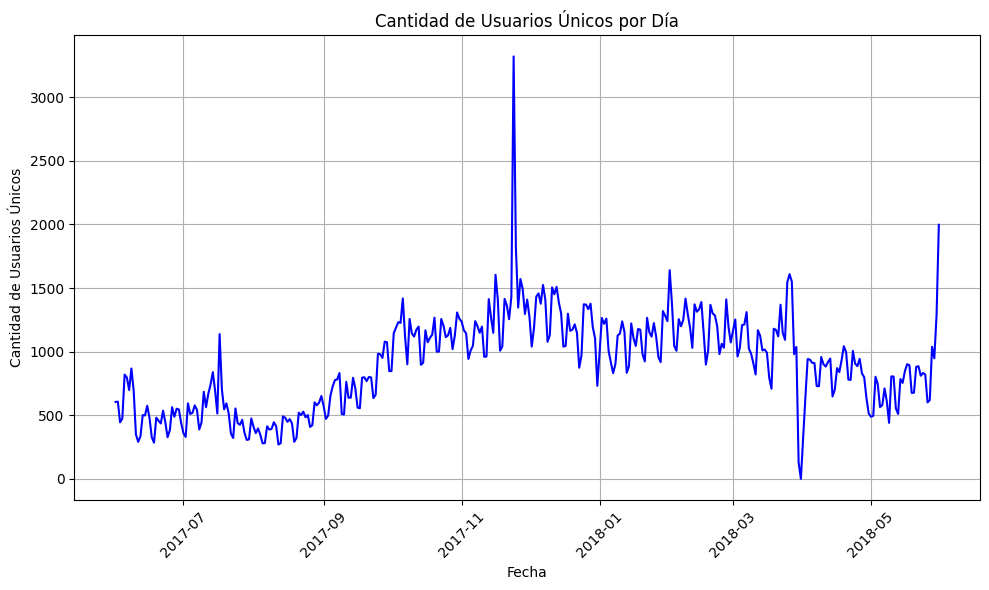

In [12]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(usuarios_by_day['day'], usuarios_by_day['Uid'], linestyle='-', color='b')

# Añadir títulos y etiquetas
plt.title('Cantidad de Usuarios Únicos por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios Únicos')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.tight_layout()       # Ajustar el diseño para que no se corten las etiquetas
plt.show()

In [13]:
# Calculamos el número de usuarios únicos por semana

usuarios_by_week = visits.groupby('week').agg({'Uid': 'nunique'}).reset_index()
print("Promedio de usuarios únicos por semana: ")
usuarios_by_week["Uid"].mean()

Promedio de usuarios únicos por semana: 


5716.245283018868

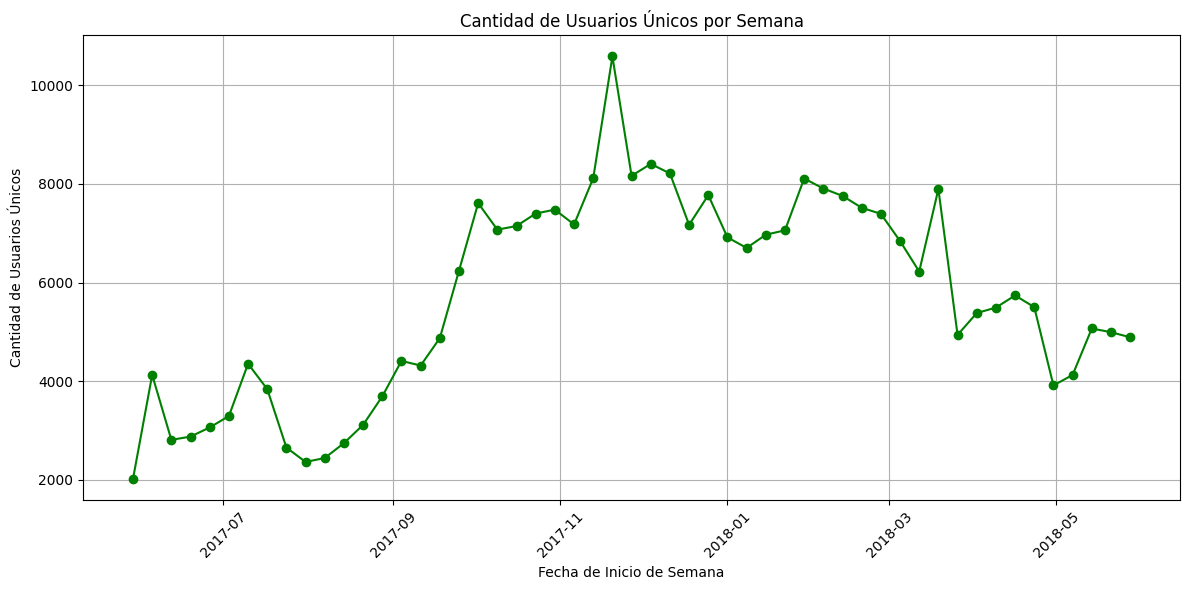

In [14]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(usuarios_by_week['week'], usuarios_by_week['Uid'], marker='o', linestyle='-', color='g')

# Añadir títulos y etiquetas
plt.title('Cantidad de Usuarios Únicos por Semana')
plt.xlabel('Fecha de Inicio de Semana')
plt.ylabel('Cantidad de Usuarios Únicos')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.tight_layout()       # Ajustar el diseño para que no se corten las etiquetas
plt.show()

In [15]:
usuarios_by_month = visits.groupby('month').agg({'Uid': 'nunique'}).reset_index()
print("Promedio de usuarios únicos por mes: ")
usuarios_by_month["Uid"].mean()

Promedio de usuarios únicos por mes: 


23228.416666666668

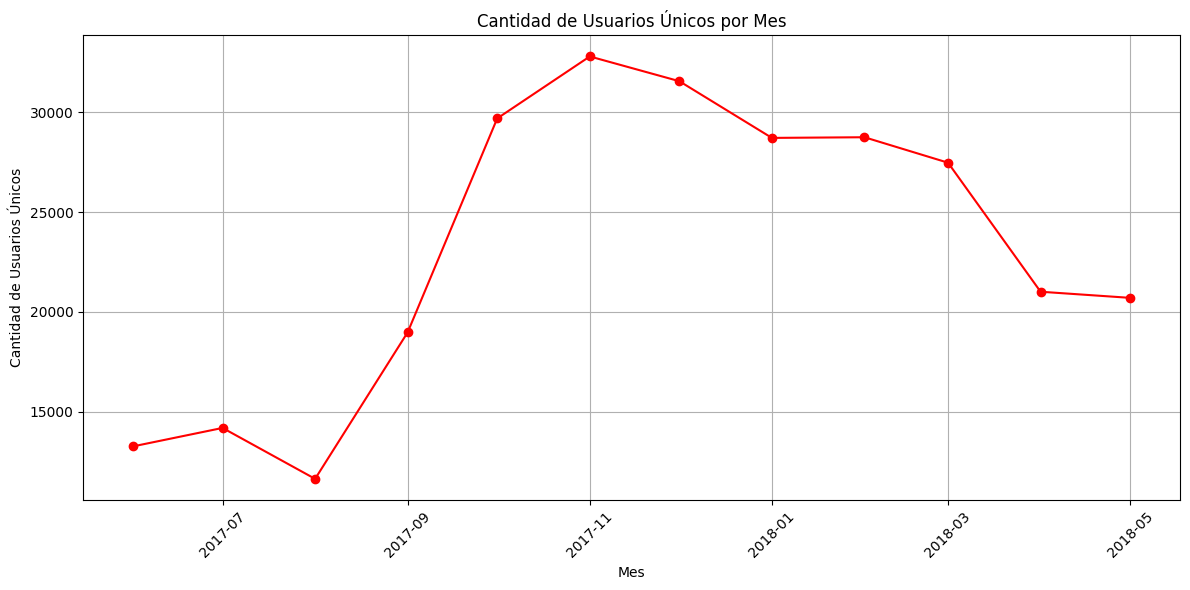

In [16]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(usuarios_by_month['month'], usuarios_by_month['Uid'], marker='o', linestyle='-', color='r')

# Añadir títulos y etiquetas
plt.title('Cantidad de Usuarios Únicos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Usuarios Únicos')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.tight_layout()       # Ajustar el diseño para que no se corten las etiquetas
plt.show()

- **¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)**


In [17]:
sessions_by_day = visits.groupby('day').agg({'Uid': 'count'}).reset_index()

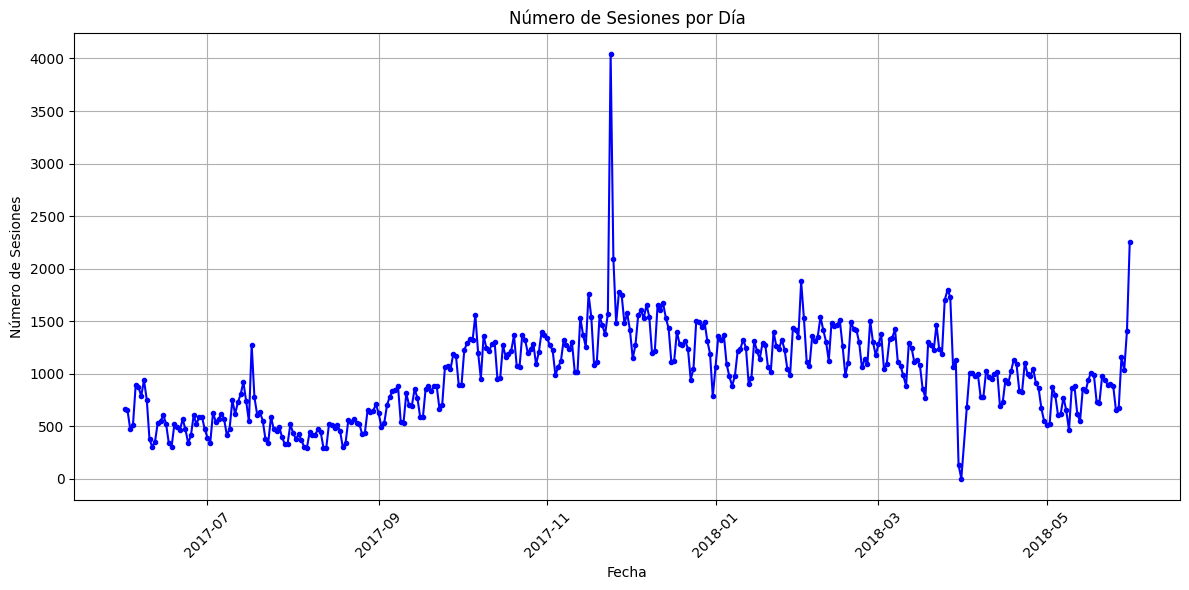

In [18]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(sessions_by_day['day'], sessions_by_day['Uid'], marker='.', linestyle='-', color='b')

# Añadir títulos y etiquetas
plt.title('Número de Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
plt.tight_layout()       # Ajustar el diseño para que no se corten las etiquetas
plt.show()

- **¿Cuál es la duración de cada sesión?**


Para calcular la duración de cada sesión, utilizaremos las columnas "End Ts" y "Start Ts" de la tabla "visits" para obtener su diferencia en segundos.

In [19]:
# Crear una nueva columna #duration_session

visits["duration_session"] = (visits["End Ts"]-visits["Start Ts"]).dt.seconds

# Obtener estadisticos para análisis de su distribución

visits["duration_session"].describe(percentiles =[0.25,0.5,0.75,0.99])


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
99%        4500.000000
max       84480.000000
Name: duration_session, dtype: float64

Dado que el 99% de las visitas es menor a 4500 segundos, solo tomaremos la duración de las visitas inferiores a este valor. Esto a fin de quitar del análisis los valores atípicos

Text(0, 0.5, 'Frecuencia de visitas')

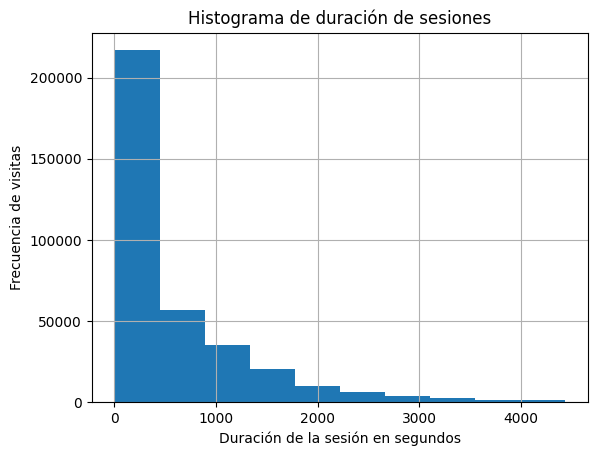

In [20]:
visits.query("duration_session < 4500")["duration_session"].hist()
plt.title('Histograma de duración de sesiones')
plt.xlabel('Duración de la sesión en segundos')
plt.ylabel('Frecuencia de visitas')

Del histograma, se observa que alrededor del 75% de las visitas no superan los 840 segundos en la duración de cada sesión.

- **¿Con qué frecuencia los usuarios y las usuarias regresan?**

In [21]:
# Obtener el mes de la primera visita para cada usuario

first_visits = (
    visits.sort_values(by="Start Ts")
    .groupby("Uid")
    .head(1)
    .rename(columns={"month": "first_month",
                    "Start Ts":"first_visit_at"})
)
first_visits.head()

,Device,End Ts,Source Id,first_visit_at,Uid,day,week,first_month,duration_session
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017-06-01,2017-05-29,2017-06-01,60
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017-06-01,2017-05-29,2017-06-01,0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017-06-01,2017-05-29,2017-06-01,840
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017-06-01,2017-05-29,2017-06-01,0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01,120


In [22]:
visits_with_cohort = pd.merge(
    visits,
    first_visits[["Uid","first_month"]],
    on="Uid"
)

#agregamos la columna "month_age" para considerar el mes de la visita en observación respecto al mes de su primer visita

visits_with_cohort["month_age"] = visits_with_cohort["month"].dt.month - visits_with_cohort["first_month"].dt.month

# Para evitar tener usuarios con atiguedad de meses negativo

visits_with_cohort["month_age"] += 12*(visits_with_cohort["month"].dt.year - visits_with_cohort["first_month"].dt.year)

#Crearemos una pivot table de los usuarios por cada cohort

visits_retention = visits_with_cohort.pivot_table(
    index="first_month",
    columns="month_age",
    values="Uid",
    aggfunc="nunique"
)

visits_retention.fillna("")

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [23]:
visits_retention_rate = visits_retention.copy()

for col in visits_retention_rate.columns:
    visits_retention_rate[col] = visits_retention_rate[col] / visits_retention[0]

In [24]:
visits_retention_rate.fillna("")

month_age,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01,1.0,0.05708,0.025454,0.020093,,,,,,,,


A continuación calcularemos el promedio de retención de cada cohorte

In [25]:
visits_retention_rate.iloc[:,1:].mean()

month_age
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

<AxesSubplot:xlabel='month_age'>

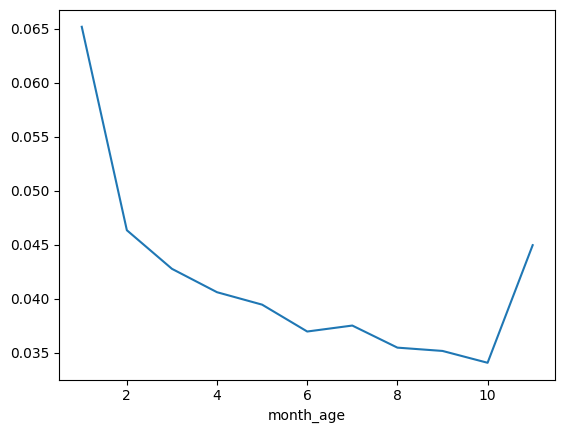

In [26]:
# Gráfico de líneas con el promedio de retención de los usuarios

visits_retention_rate.iloc[:,1:].mean().plot(kind="line")

Del gráfico se observa que a partir del mes 11, hay un salto en el promedio de retención, dado que no tenemos suficientes datos y solo se esta considerando la retención 0.044 del cohorte 11.

## Ventas

- **¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).**

El siguiente paso será separar los meses, semanas y días de las columnas de fecha. Vamos a llamar al método .dt.to_period().

In [27]:
orders["day"] = orders["Buy Ts"].dt.to_period("D").dt.start_time
orders["week"] = orders["Buy Ts"].dt.to_period("W").dt.start_time
orders["month"] = orders["Buy Ts"].dt.to_period("M").dt.start_time

In [28]:
orders.head()

,Buy Ts,Revenue,Uid,day,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01


In [29]:
# Obtener el mes de la primera compra para cada usuario

first_orders = (
     orders.sort_values(by="Buy Ts")
    .groupby("Uid")
    .head(1)
    .rename(columns={"month": "first_order_month",
                    "Buy Ts":"first_order_at"})
)
first_orders.head()

,first_order_at,Revenue,Uid,day,week,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29,2017-06-01


In [30]:
# Fusionamos las tablas que contienen las columnas con las primeras visitas y las primeras compras de cada usuario

conversion_times = pd.merge(
    first_orders[["Uid","first_order_at", "first_order_month"]],
    first_visits[["Uid", "first_visit_at","first_month", "Source Id"]]
)

# Creamos una nueva columna "time_to_order" para calcular la diferencia en horas entre las columnas "first_order_at" y "first_visit_at"

conversion_times["time_to_order"] = conversion_times["first_order_at"] - conversion_times["first_visit_at"]

# Calculamos el porcentaje de conversión acumulada

conversion_times["time_to_order"] /= np.timedelta64(1, "h")

conversion_times.head()

,Uid,first_order_at,first_order_month,first_visit_at,first_month,Source Id,time_to_order
0,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00,2017-06-01,1,0.016667
1,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.183333
2,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:25:00,2017-06-01,2,0.033333
3,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:14:00,2017-06-01,2,0.250000
4,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:31:00,2017-06-01,3,0.450000


In [31]:
total_users = len(conversion_times)

In [32]:
print(f"""
usuarios 0d: {sum(conversion_times["time_to_order"] < 24) / total_users}
usuarios 1d: {sum(conversion_times["time_to_order"] < 48) / total_users}
usuarios 2d: {sum(conversion_times["time_to_order"] < 72) / total_users}
usuarios 3d: {sum(conversion_times["time_to_order"] < 96) / total_users}
usuarios 7d: {sum(conversion_times["time_to_order"] < 192) / total_users}
usuarios 30d: {sum(conversion_times["time_to_order"] < 744) / total_users}
usuarios 365d: {sum(conversion_times["time_to_order"] < 8784) / total_users}

""")

#el 75% de los usuarios compro entre 0 y 24 horas


usuarios 0d: 0.7218191276729732
usuarios 1d: 0.7495003148700818
usuarios 2d: 0.7649152588779673
usuarios 3d: 0.7767981819675273
usuarios 7d: 0.8061495495988829
usuarios 30d: 0.8657832051036334
usuarios 365d: 1.0




- **¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [33]:
# Agrupamos por día realizando un conteo, y calculamos el promedio

orders_by_day = orders.groupby('day').size().mean()
print("pedidos promedio por día: ")
orders_by_day


pedidos promedio por día: 


138.50274725274724

In [34]:
# Agrupamos por semana realizando un conteo, y calculamos el promedio

orders_by_week = orders.groupby('week').size().mean()
print("pedidos promedio por semana: ")
orders_by_week

pedidos promedio por semana: 


951.2264150943396

In [35]:
# Agrupamos por mes realizando un conteo, y calculamos el promedio

orders_by_month = orders.groupby('month').size().mean()
print("pedidos promedio por mes: ")
orders_by_month

pedidos promedio por mes: 


3878.076923076923

- **¿Cuál es el tamaño promedio de compra?**

In [36]:
# Calculamos el promedio general de la columna "Revenue" de la tabla "orders"
average_order = orders['Revenue'].mean()
print("Tamaño promedio de compra: ")
average_order



Tamaño promedio de compra: 


4.999646930477041

In [37]:
# Calculate the lifetime value (LTV) per user
average_by_user = orders.groupby('Uid')['Revenue'].sum().mean()

print("LTV por usuario: ")
average_by_user

LTV por usuario: 


6.901327930345262

- **¿Cuánto dinero traen? (LTV)**

In [38]:
#Unir las tablas "orders" y "visits_with_cohort", a fin de conectar la columna "Source Id" con "orders"
orders = orders.merge(visits_with_cohort[['Uid', 'Source Id', 'month_age']], on='Uid', how='left')

#Calcular ingreso total por cohort y source_id
income_cohorte_source = orders.groupby(['month_age', 'Source Id'])['Revenue'].sum().reset_index()
income_cohorte_source.columns = ['month_age', 'source_id', 'total_revenue']
income_cohorte_source

,month_age,source_id,total_revenue
0,0,1,214223.36
1,0,2,197792.96
2,0,3,72908.28
3,0,4,98822.74
4,0,5,326965.98
...,...,...,...
80,11,3,13722.55
81,11,4,15608.35
82,11,5,15289.91
83,11,9,882.06


In [39]:
# Creamos un pivot table con cohorts como filas y source_id como columnas

table = income_cohorte_source.pivot_table(
    index='month_age',
    columns='source_id',
    values='total_revenue',
    aggfunc='sum'
)

In [40]:
# Calculamos el numero de usuarios
users = orders.groupby(['month_age', 'Source Id'])['Uid'].nunique().reset_index()
users.columns = ['month_age', 'source_id', 'unique_users']

In [41]:
# Visualizamos el numero de usuarios con un pivot table: cohortes como filas y fuentes como columnas

users_pivot = users.pivot_table(
    index='month_age',
    columns='source_id',
    values='unique_users',
    aggfunc='sum')

In [42]:
# LTV = Ingresos / numero de usuarios

LVT = table / users_pivot  

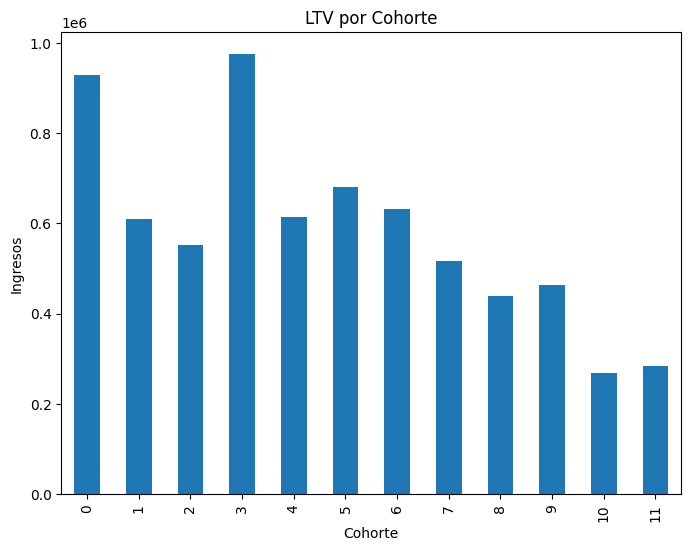

In [43]:
# Graficar LTV por Cohorte
plt.figure(figsize=(8, 6))
table.sum(axis=1).plot(kind='bar')
plt.title('LTV por Cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Ingresos')
plt.show()

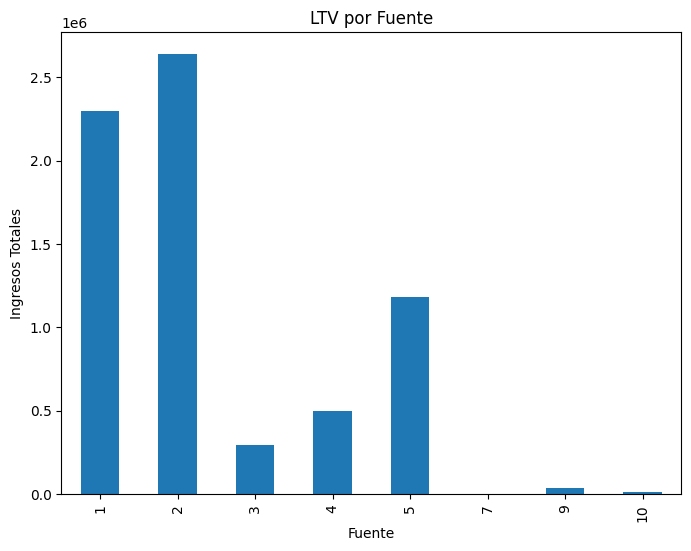

In [44]:
# Graficar LTV por Fuente
plt.figure(figsize=(8, 6))
table.sum(axis=0).plot(kind='bar')
plt.title('LTV por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Ingresos Totales')
plt.show()

## Marketing
 
- **¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)**

El siguiente paso será separar los meses, semanas y días de las columnas de fecha. Vamos a llamar al método .dt.to_period().

In [45]:
costs["day"] = costs["dt"].dt.to_period("D").dt.start_time
costs["week"] = costs["dt"].dt.to_period("W").dt.start_time
costs["month"] = costs["dt"].dt.to_period("M").dt.start_time

In [46]:
# Calcular los gastos totales por cohorte y fuente de anuncio
costs = costs.rename(columns={"month":"cohorte"})
costs_cohorte_source = pd.DataFrame(costs.groupby(['cohorte', 'source_id'],
                                      observed=True)['costs']
                        .sum()
                        .rename("total_cost")
                        )
costs_cohorte_source_pivot = costs_cohorte_source.pivot_table(
    index='cohorte',
    columns='source_id',
    values='total_cost',
    aggfunc='sum')

costs_cohorte_source_pivot

source_id,1,2,3,4,5,9,10
cohorte,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [47]:
# Calculamos el costo diario por fuente

daily_cost = (costs.groupby(['source_id', 'day'], observed=True)['costs'].sum())
print(f"El costo diario fue de: {daily_cost.mean():.2f}")

El costo diario fue de: 129.48


- **¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [48]:
visits_with_cohort = visits_with_cohort.assign(
    first_day=visits_with_cohort.groupby('Uid')['day'].transform('min')
    )
visits_with_cohort

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month,duration_session,first_month,month_age,first_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,1080,2017-12-01,0,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,1680,2018-02-01,0,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,0,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,1440,2018-03-01,2,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-05,2018-03-01,1680,2018-03-01,0,2018-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,2018-04-23,2018-04-01,480,2018-04-01,0,2018-04-23
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,2017-11-06,2017-11-01,0,2017-11-01,0,2017-11-08
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,2017-07-31,2017-07-01,1080,2017-07-01,0,2017-07-31
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,2018-03-19,2018-03-01,840,2018-03-01,0,2018-03-20


In [49]:
first_orders_source = (visits_with_cohort[["Uid","Source Id", "first_day"]]
                       .rename(columns={"Source Id":"source_id",
                                        "first_day":'day'}))

# Encontramos la adquisición diaria uniendo las tablas anteriores
daily_adq = (
    first_orders_source
    .groupby(['source_id', 'day'])['Uid']
    .nunique()
).rename('new_users')

# Calculamos el CAC por dia

daily_cac = pd.merge(daily_cost, daily_adq, left_index=True, right_index=True)

daily_cac

costs  new_users
source_id day                         
1         2017-06-01  75.20        112
          2017-06-02  62.25         71
          2017-06-03  36.53         50
          2017-06-04  55.00         57
          2017-06-05  57.08        103
...                     ...        ...
10        2018-05-27   9.92          5
          2018-05-28  21.26         34
          2018-05-29  11.32         24
          2018-05-30  33.15         60
          2018-05-31  17.60        107

[2539 rows x 2 columns]

In [50]:
# Calculamos el CAC poe fuente

CAC_source = (daily_cac.groupby('source_id').sum()
                .assign(CAC=lambda x: x['costs'] / x['new_users'])
)

CAC_source

,costs,new_users,CAC
source_id,,,
1,20833.27,18998,1.096603
2,42806.04,26245,1.631017
3,141321.63,74756,1.890439
4,61073.60,83525,0.731201
5,51756.40,56974,0.908421
9,5497.39,9264,0.593414
10,5822.49,8067,0.721766


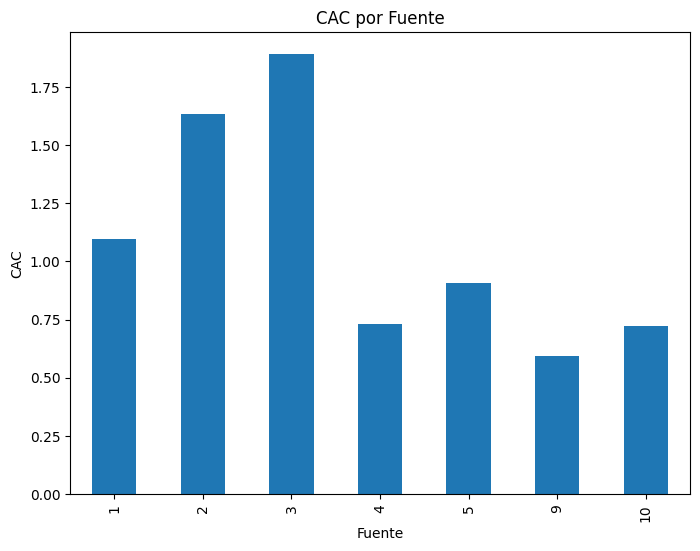

In [51]:
# Gráfico CAC

plt.figure(figsize=(8, 6))
CAC_source['CAC'].plot(kind='bar')
plt.title('CAC por Fuente')
plt.xlabel('Fuente')
plt.ylabel('CAC')
plt.show()

- **¿Cuán rentables eran las inversiones? (ROMI)**

In [52]:
# Calculamos el LTV por fuente:
LTV_source = table.sum(axis=0).rename("LTV")

data_source = CAC_source.join(LTV_source)
data_source = data_source.assign(ROMI=data_source['LTV'] / data_source['CAC'])

In [53]:
data_source[["CAC","LTV","ROMI"]]

,CAC,LTV,ROMI
source_id,,,
1,1.096603,2298200.17,2.095744e+06
2,1.631017,2638189.21,1.617512e+06
3,1.890439,296687.96,1.569413e+05
4,0.731201,496690.17,6.792795e+05
5,0.908421,1181477.14,1.300583e+06
9,0.593414,36342.25,6.124263e+04
10,0.721766,14619.23,2.025479e+04


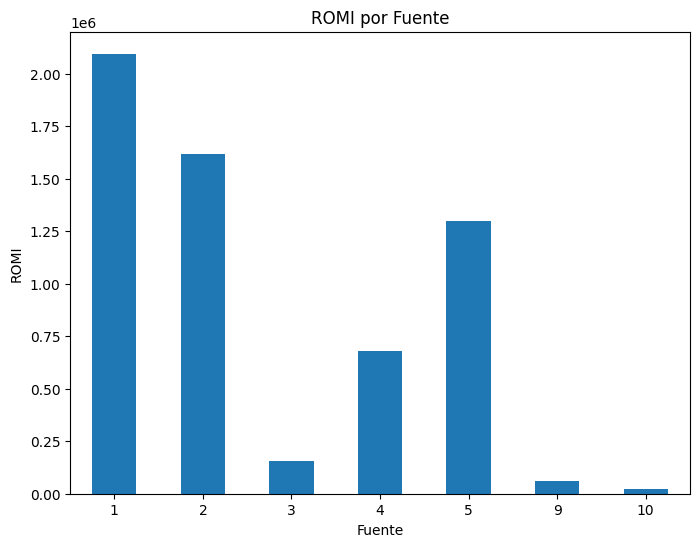

In [54]:
# Graficamos el ROMI

plt.figure(figsize=(8, 6))
data_source['ROMI'].plot(kind='bar')
plt.title('ROMI por Fuente')
plt.xlabel('Fuente')
plt.ylabel('ROMI')
plt.xticks(rotation=0)
plt.show()

# Conclusiones

Luego de analizar los gastos de marketing de Y.Afishade, se concluye que la evaluación del retorno sobre la inversión en marketing (ROMI) ofrece una visión clara sobre la eficiencia de cada fuente de inversión, revelando cómo cada unidad monetaria invertida se traduce en ingresos. Las fuentes con un ROMI elevado demuestran una rentabilidad excepcional y, por lo tanto, deberían ser el foco principal de las inversiones futuras.

En particular, la Fuente 1 destaca por ser el ROMI mas alto de 2.095.740, indicando que por cada unidad monetaria invertida, se generan 2.095.740 unidades monetarias en ingresos. Esta fuente no solo es la más eficiente, sino que también representa la mejor oportunidad para maximizar el retorno de inversión, por lo que debería recibir una porción significativa del presupuesto de marketing. La Fuente 2, con un ROMI igualmente impresionante de 1.65, también sugiere una rentabilidad superior y merece una inversión adicional. Del mismo modo, la Fuente 5, con un ROMI de 1,300 sigue siendo una opción altamente rentable que justifica una atención continua.

En contraste, las Fuentes 10 y 9, aunque rentables con ROMIs de 20.254 y 61.019 respectivamente, muestran un retorno significativamente menor en comparación con las principales fuentes mencionadas. Esto sugiere que estas fuentes, aunque no carecen de valor, podrían no justificar el mismo nivel de inversión en relación con el costo de oportunidad que presentan.

En resumen, para optimizar el retorno de las inversiones de marketing, es esencial concentrar los recursos en las fuentes con los ROMI más altos, como las fuentes 1, 5 y 2. Las fuentes con un ROMI más bajo deben ser cuidadosamente reevaluadas para determinar si su rendimiento justifica la continuación de la inversión o si es más beneficioso redistribuir los recursos hacia opciones más rentables.